In [7]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440

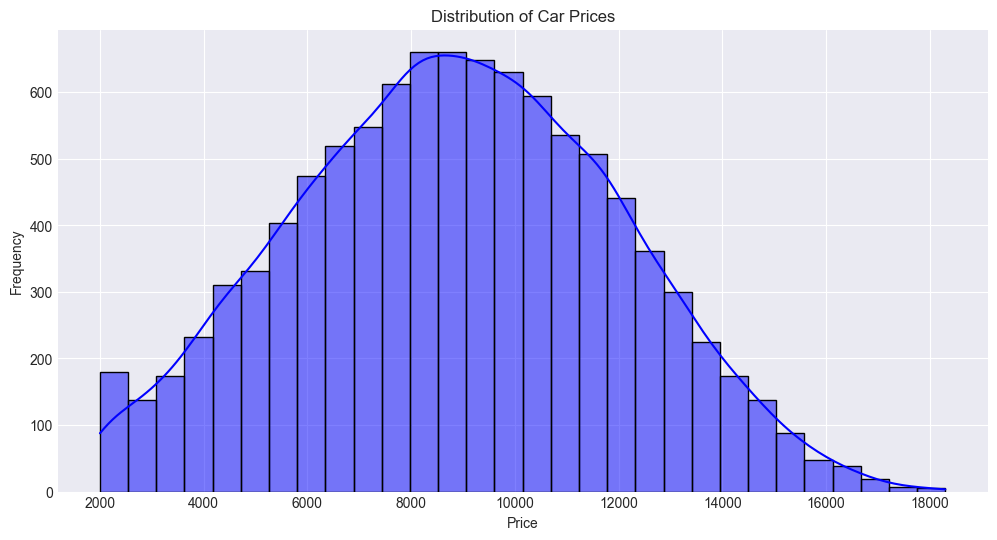

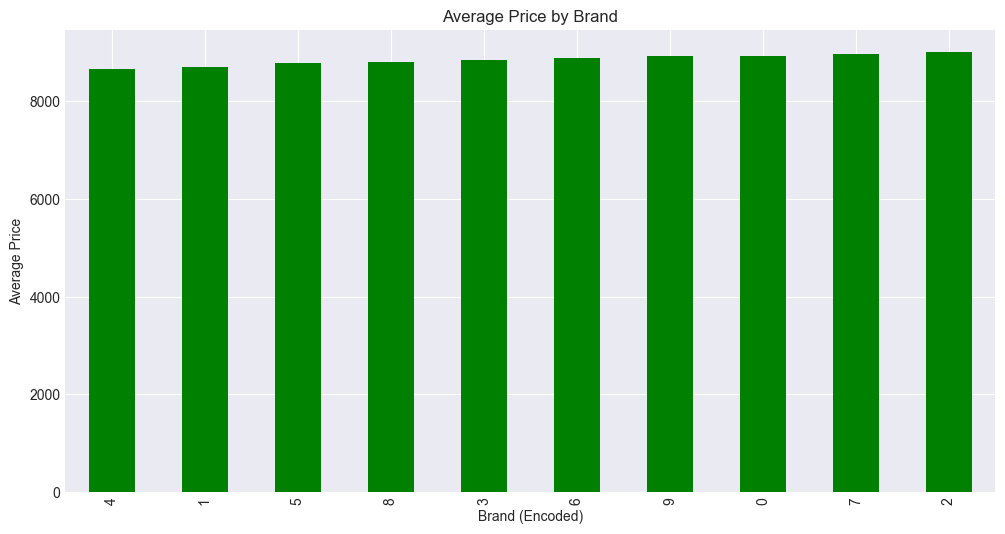

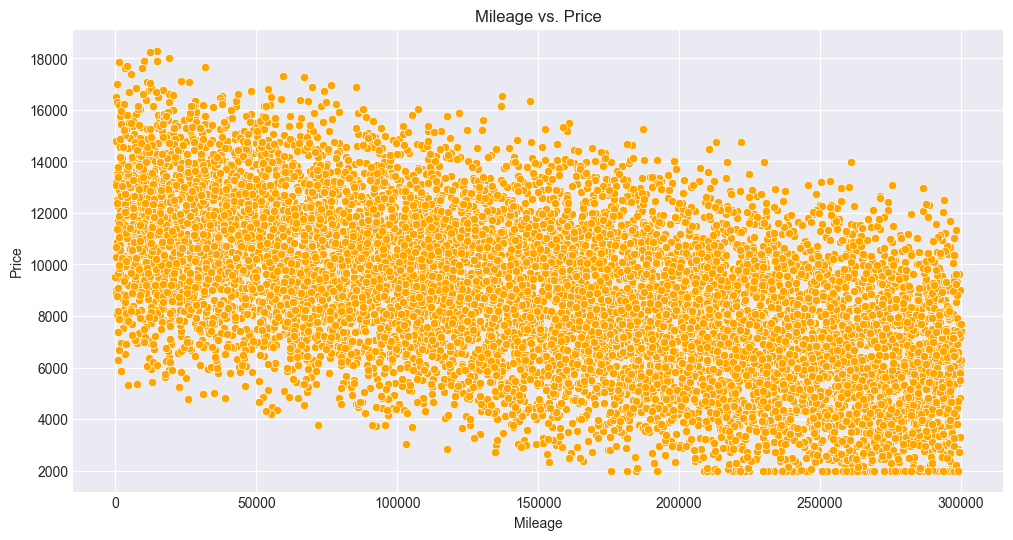

C:\Users\dell\AppData\Local\Temp\ipykernel_16960\1516962870.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Price', data=data, palette='Set2')


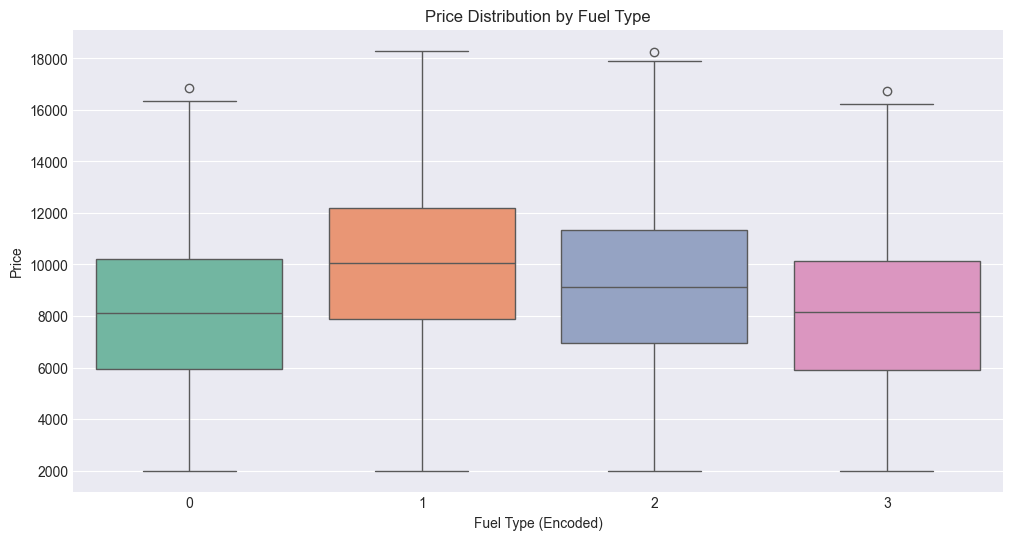

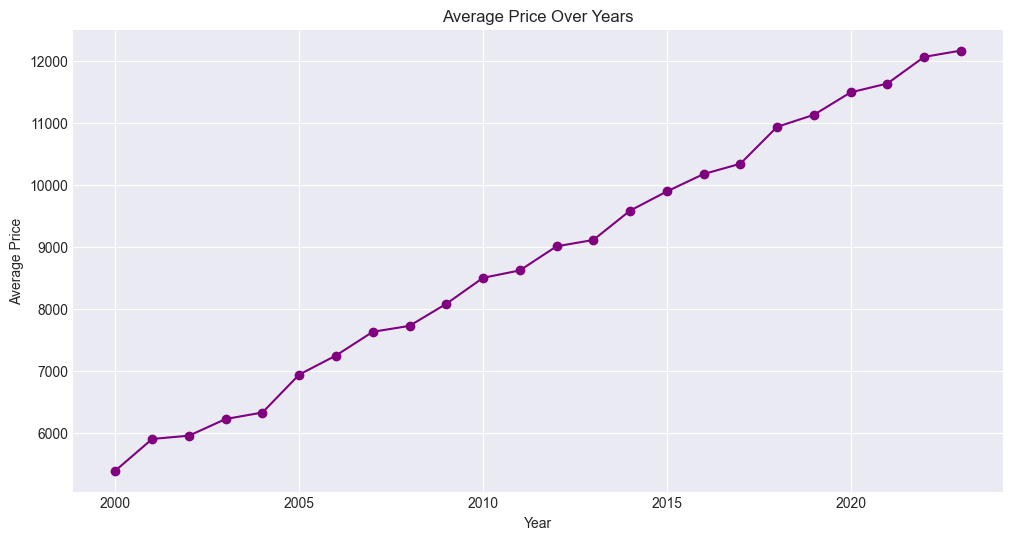

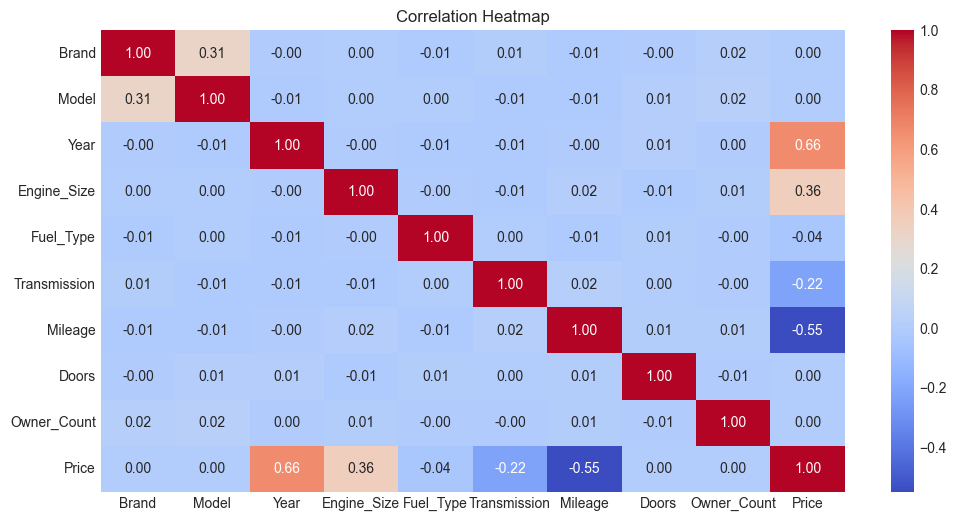

C:\Users\dell\AppData\Local\Temp\ipykernel_16960\1516962870.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Engine_Size', y='Price', data=data, palette='husl')


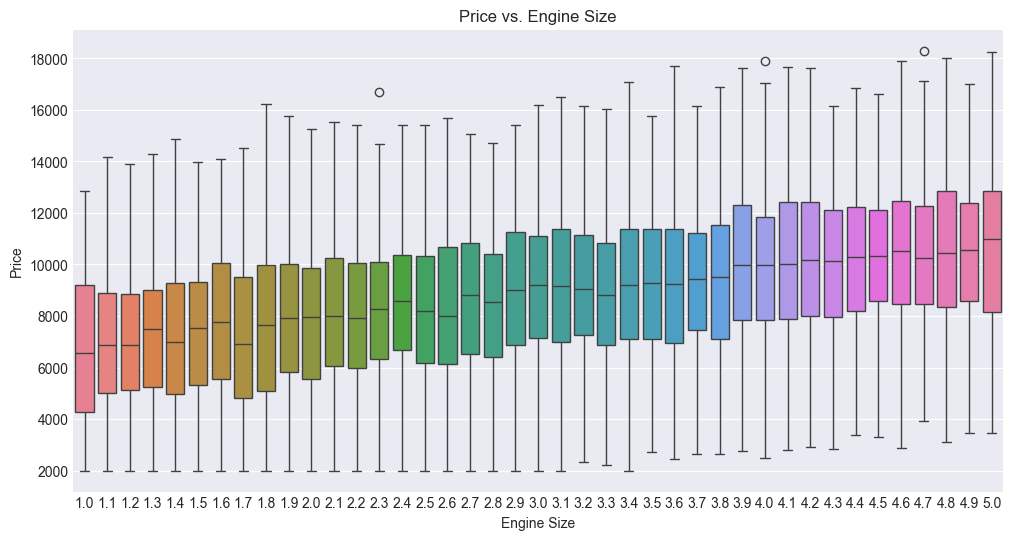

C:\Users\dell\AppData\Local\Temp\ipykernel_16960\1516962870.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transmission', y='Price', data=data, ci=None, palette='rocket')
C:\Users\dell\AppData\Local\Temp\ipykernel_16960\1516962870.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='Price', data=data, ci=None, palette='rocket')


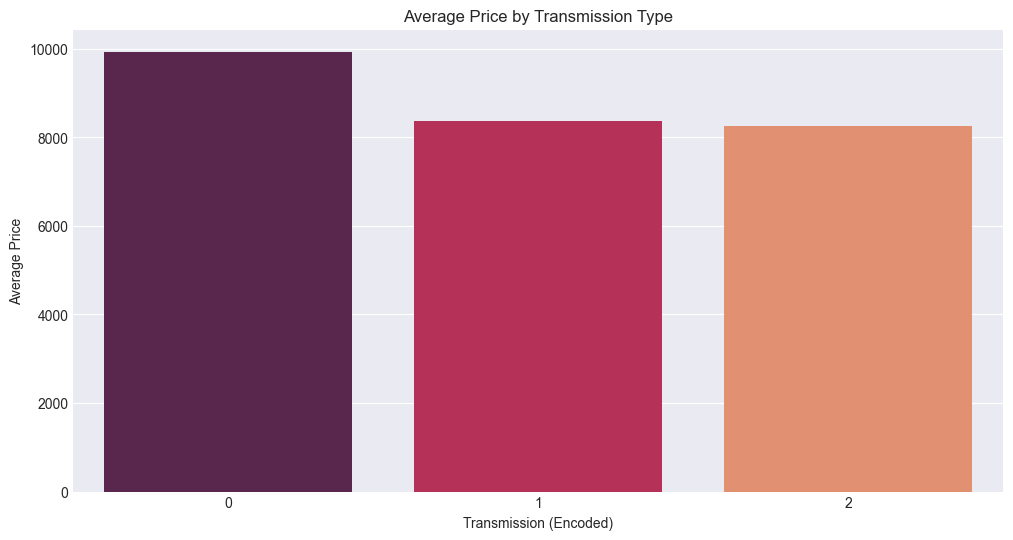

Mean Absolute Error: 825.4504369041343 
,Mean Squared Error:  936727.6193957413,
 Score: 0.8980467128823123


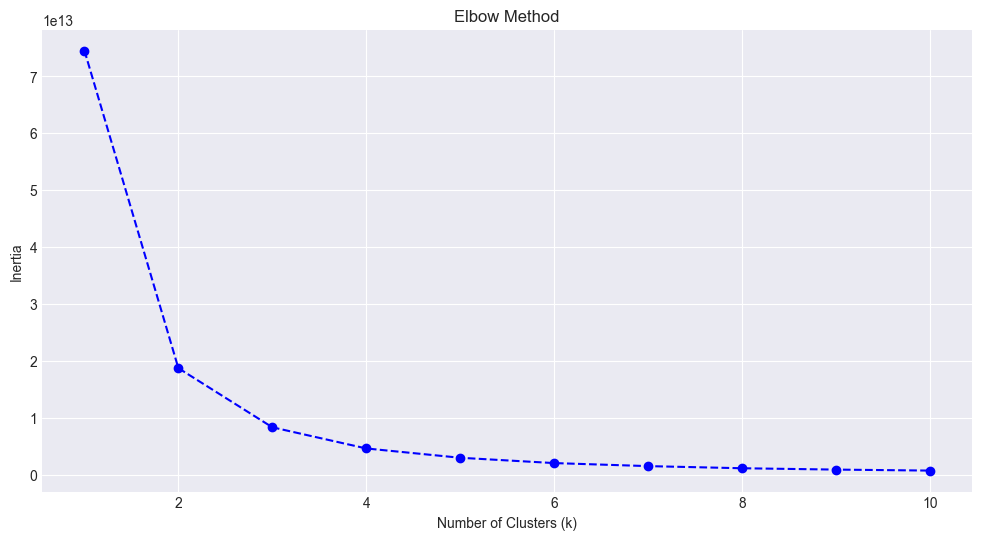

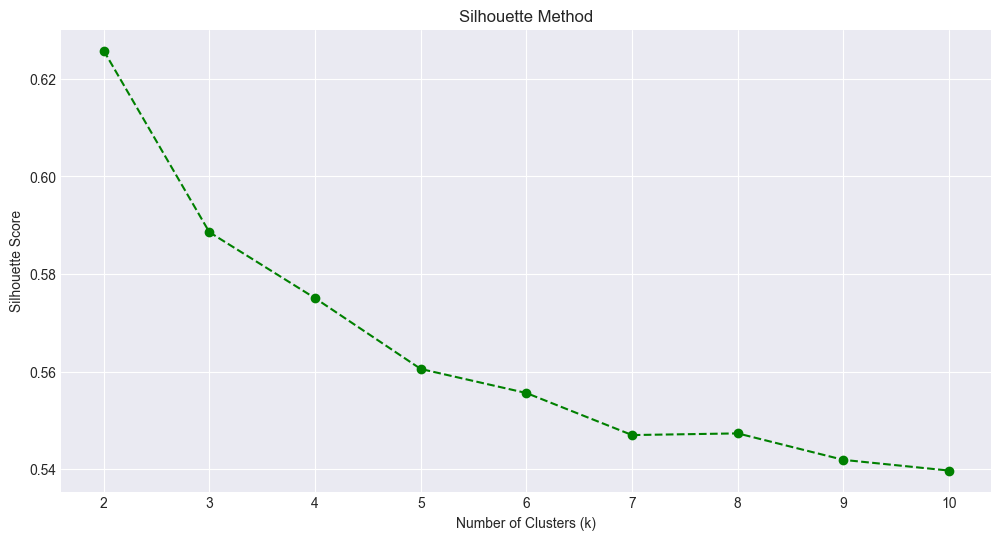

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


# Load the uploaded CSV file
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\\car_price_dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head(), data.info(), data.describe())


# Data Preprocessing

# Encoding categorical columns
label_encoders = {}
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Summary of the dataset after preprocessing
data.describe()

# Set up for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('muted')
plt.rcParams['figure.figsize'] = (12, 6)

# Visualization 1: Distribution of Car Prices
sns.histplot(data['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Average Price by Brand
brand_price = data.groupby('Brand')['Price'].mean().sort_values()
brand_price.plot(kind='bar', color='green')
plt.title('Average Price by Brand')
plt.xlabel('Brand (Encoded)')
plt.ylabel('Average Price')
plt.show()

# Visualization 3: Mileage vs. Price
sns.scatterplot(x='Mileage', y='Price', data=data, color='orange')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Visualization 4: Boxplot of Prices by Fuel Type
sns.boxplot(x='Fuel_Type', y='Price', data=data, palette='Set2')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type (Encoded)')
plt.ylabel('Price')
plt.show()

# Visualization 5: Price Trends Over Years
year_price = data.groupby('Year')['Price'].mean()
year_price.plot(kind='line', marker='o', color='purple')
plt.title('Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

# Visualization 6: Correlation Heatmap
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Visualization 7: Price vs. Engine Size
sns.boxplot(x='Engine_Size', y='Price', data=data, palette='husl')
plt.title('Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

# Visualization 8: Price by Transmission Type
sns.barplot(x='Transmission', y='Price', data=data, ci=None, palette='rocket')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission (Encoded)')
plt.ylabel('Average Price')
plt.show()



# Splitting the dataset into features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost Regressor
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = adaboost_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae} \n,Mean Squared Error:  {mse},\n Score: {r2}")


# Selecting features for K-Means (using all numerical features except 'Price')
X_kmeans = data.drop('Price', axis=1)

# Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_kmeans)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Silhouette Method to evaluate cluster quality
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not valid for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_kmeans)
    silhouette_scores.append(silhouette_score(X_kmeans, labels))

# Plotting Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='g')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  int32  
 1   Model         10000 non-null  int32  
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  int32  
 5   Transmission  10000 non-null  int32  
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int32(4), int64(5)
memory usage: 625.1 KB


C:\Users\dell\AppData\Local\Temp\ipykernel_16960\2512714397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Brand",data=data,palette="Blues")


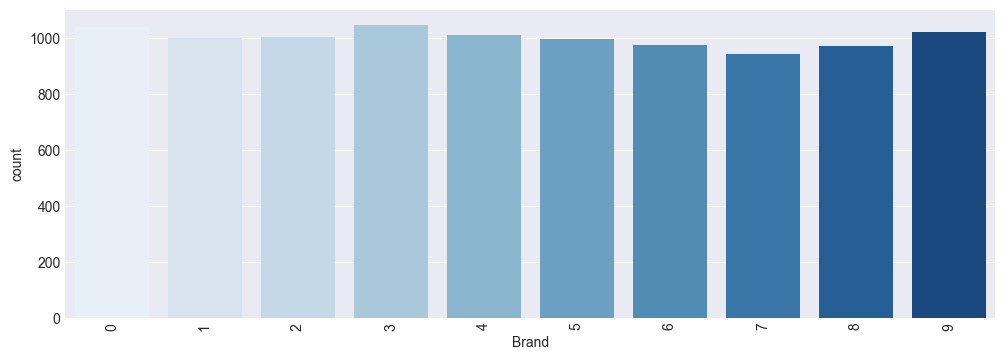

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x="Brand",data=data,palette="Blues")
plt.xticks(rotation=90)
plt.show()

In [12]:
le=LabelEncoder()
data["Brand"]=le.fit_transform(data["Brand"])
data["Model"]=le.fit_transform(data["Model"])
data["Fuel_Type"]=le.fit_transform(data["Fuel_Type"])
data["Transmission"]=le.fit_transform(data["Transmission"])

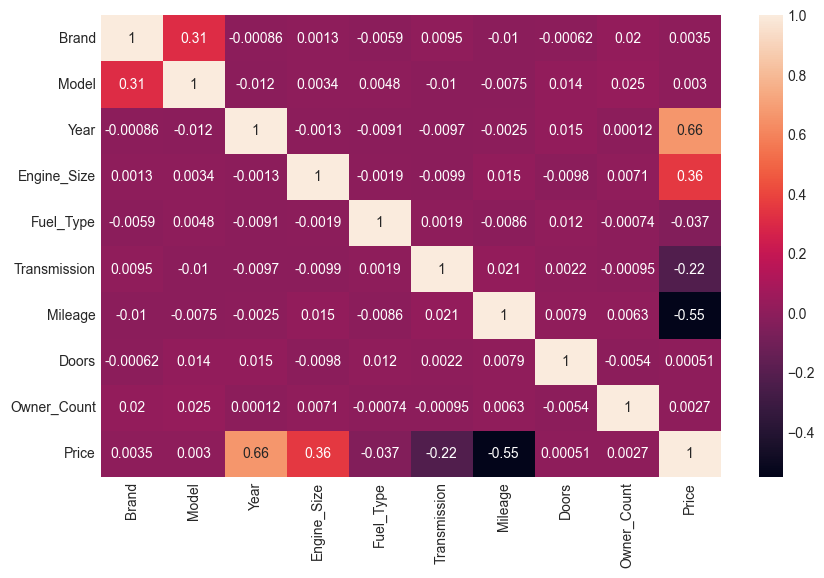

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
x=data.drop(["Price"],axis=1)
y=data["Price"]
ss=StandardScaler()
x=ss.fit_transform(x)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
}

In [17]:
param_grids = {
    'Ridge': {'alpha': [0.1, 1, 10]},
    'Lasso': {'alpha': [0.1, 1, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]},
    'SVR': {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1], 'kernel': ['linear', 'rbf']},
}

In [18]:
results={}
for model_name in models:
    print(f"Tuning hyperparameters for {model_name}...")
    
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test,y_pred)
    results[model_name] = {'best_params': grid_search.best_params_, 'test_mse': mse,"R2":r2*100}

Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for RandomForest...
Tuning hyperparameters for SVR...


In [19]:
for model_name, result in results.items():
    print(f"{model_name}: Best Params: {result['best_params']}, Accuracy: {result['R2']}")

Ridge: Best Params: {'alpha': 0.1}, Accuracy: 91.09052038490249
Lasso: Best Params: {'alpha': 1}, Accuracy: 91.09185547809912
RandomForest: Best Params: {'max_depth': None, 'n_estimators': 200}, Accuracy: 97.65677189408034
SVR: Best Params: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}, Accuracy: 89.32143284639234


In [20]:
results_data = {
    'Model': ['Ridge', 'Lasso', 'RandomForest', 'SVR'],
    'Test MSE': [818586.223735, 818463.557884, 215464.610218, 981126.658213],
    'R2': [91.09052, 91.091855, 97.654887, 89.321433]
}
result=pd.DataFrame(results_data)

In [21]:
result.head(5)

,Model,Test MSE,R2
0,Ridge,818586.223735,91.090520
1,Lasso,818463.557884,91.091855
2,RandomForest,215464.610218,97.654887
3,SVR,981126.658213,89.321433


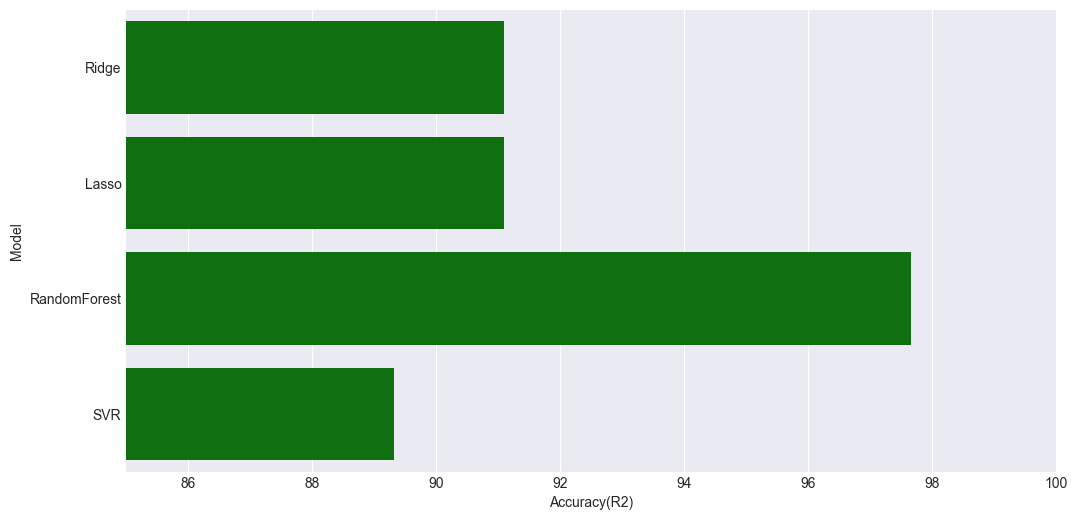

In [22]:
sns.barplot(y="Model",x="R2",data=result,color="green")
plt.xlabel("Accuracy(R2)")
plt.xlim(85,100)
plt.show()